## Sistemas Inteligentes para a Bioinformática (Intelligent Systems for Bioinformatics)

Notebook of the Intelligent Systems for Bioinformatics Curricular Unit's group project integrated in the Master's Degree in Bioinformatics at University of Minho, 2022/2023

**Group members**:
- Ana Carolina Inácio, PG45459;
- Ana Rafaela Pereira, PG45461;
- Mariana Coelho, PG45967

**Dataset used in this project**:
"Heart Attack Analysis & Prediction Dataset", a dataset for heart attack classification, available at https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# About this dataset...
- **age**: age of the patient
- **sex**: sex of the patient
- **cp**: chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic
- **trtbps**: resting blood pressure (in mm Hg)
- **chol**: cholesterol in mg/dl fetched via BMI sensor
- **fbs**: (fasting blood sugar > 120 mg/dl)
  - 1 = true
  - 0 = false
- **restecg**: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalachh**: maximum heart rate achieved
- **exng**: exercise induced angina
  - 1 = yes
  - 0 = no
- **oldpeak**: ST depression induced by exercise relative to rest
- **slp**: the slope of the peak exercise ST segment
  - 0 = unsloping
  - 1 = flat
  - 2 = downsloping
- **caa**: number of major vessels (0-3)
- **thall**: thalassemia
  - 0 = null
  - 1 = fixed defect
  - 2 = normal
  - 3 = reversable defect
- **o2_saturation**: O2 saturation levels
- **output**: diagnosis of heart disease (angiographic disease status) - target variable
  - 0: < 50% diameter narrowing. less chance of heart disease
  - 1: > 50% diameter narrowing. more chance of heart disease

## In this notebook, you can find...
- Data pre-processing
- Exploratory data analysis
- Statistical tests and correlation
- Machine learning (Supervised learning, classification problem)
  - Model fitting (SVM, Logistic Regression and KNN models);
  - Ensemble (Bagging classifier, Random Forest and Voting Classifier);
  - Feature selection (Variance Threshold, Select K-Best and Select Percentile);
  - Hyperparameter tuning (Grid Search and Randomized Parameter Optimization).

In [388]:
# imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import uniform
import seaborn as sn
import matplotlib.pylab as plt
from sklearn import preprocessing

# Data pre-processing

In [2]:
# read heart.csv file
filepath_heart = 'C:/Users/Ana/Documents/GitHub/mbioinf-sib-group-project/heart.csv'

df_heart = pd.read_csv(filepath_heart)
df_heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# see 5 first rows
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# get shape of heart df
df_heart.shape

(303, 14)

In [5]:
# read o2Saturation.csv file
filepath_o2 = 'C:/Users/Ana/Documents/GitHub/mbioinf-sib-group-project/o2Saturation.csv'

df_o2 = pd.read_csv(filepath_o2)
df_o2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [6]:
# give a label to o2 dataset
df_o2.rename(columns={"98.6": "o2_saturation"}, inplace=True)

df_o2

,o2_saturation
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [7]:
# get shape of o2 saturation df
df_o2.shape

(3585, 1)

In [8]:
# merge the two datasets
data = df_heart.join(df_o2)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


In [9]:
# see first 5 rows
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [10]:
# see the last 5 rows
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,97.5


In [11]:
# check the type of variables
data.dtypes

age                int64
sex                int64
cp                 int64
trtbps             int64
chol               int64
fbs                int64
restecg            int64
thalachh           int64
exng               int64
oldpeak          float64
slp                int64
caa                int64
thall              int64
output             int64
o2_saturation    float64
dtype: object

In [12]:
# search for NaN values
data.isnull().sum()

age              0
sex              0
cp               0
trtbps           0
chol             0
fbs              0
restecg          0
thalachh         0
exng             0
oldpeak          0
slp              0
caa              0
thall            0
output           0
o2_saturation    0
dtype: int64

In [13]:
# remove NaN values
# data = dataset.dropna()
# data

In [14]:
# get shape of the dataset
data.shape

(303, 15)

In [15]:
# get the summary of the dataset
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2_saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [16]:
# check all data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trtbps         303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalachh       303 non-null    int64  
 8   exng           303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slp            303 non-null    int64  
 11  caa            303 non-null    int64  
 12  thall          303 non-null    int64  
 13  output         303 non-null    int64  
 14  o2_saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


In [17]:
# get list of co
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'o2_saturation'],
      dtype='object')

In [18]:
# change order of columns
new_order = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'o2_saturation', 'output']
# data = data.reindex(columns=new_order)

data = data[new_order]

data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2_saturation,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,97.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,97.5,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,97.5,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,97.5,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,97.5,0


# Exploratory data analysis

In [20]:
# get range of values of the variables
data.apply(lambda x: str(x.min()) + "---" + str(x.max()))

age                  29---77
sex                    0---1
cp                     0---3
trtbps              94---200
chol               126---564
fbs                    0---1
restecg                0---2
thalachh            71---202
exng                   0---1
oldpeak            0.0---6.2
slp                    0---2
caa                    0---4
thall                  0---3
o2_saturation    96.5---98.6
output                 0---1
dtype: object

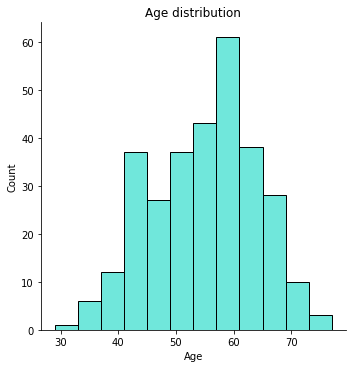

In [21]:
# check the distribution of age
sn.displot(data=data, x="age", color="turquoise")
plt.xlabel("Age")
plt.title("Age distribution")
plt.show()

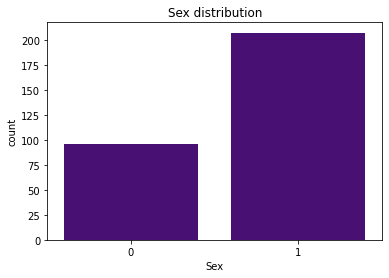

In [22]:
# check the distribution of sex
sn.countplot(data=data, x="sex", color="indigo")
plt.xlabel("Sex")
plt.title("Sex distribution")
plt.show()

**age:** 1: male; 0: female

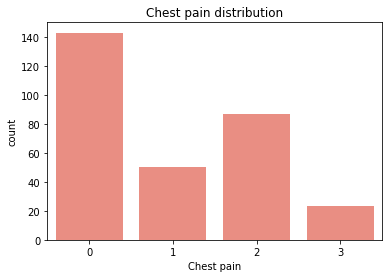

In [23]:
# check the distribution of chest pain
sn.countplot(data=data, x="cp", color="salmon")
plt.xlabel("Chest pain")
plt.title("Chest pain distribution")
plt.show()

**chest pain:** 0: typical angina; 1: atypical angina; 2: non-anginal pain; 3: asymptomatic

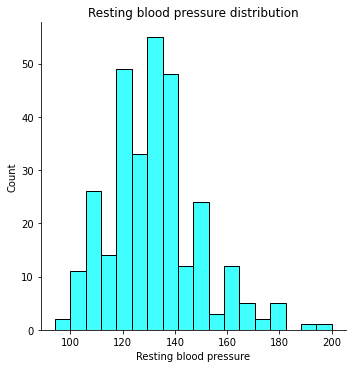

In [24]:
# check the distribution of resting blood pressure
sn.displot(data=data, x="trtbps", color="aqua")
plt.xlabel("Resting blood pressure")
plt.title("Resting blood pressure distribution")
plt.show()

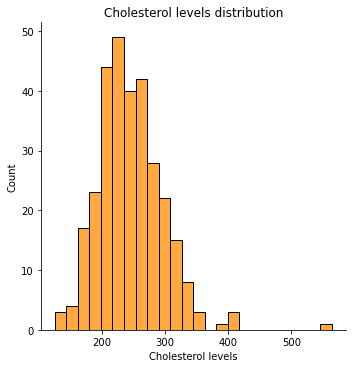

In [25]:
# check the distribution of cholesterol
sn.displot(data=data, x="chol", color="darkorange")
plt.xlabel("Cholesterol levels")
plt.title("Cholesterol levels distribution")
plt.show()

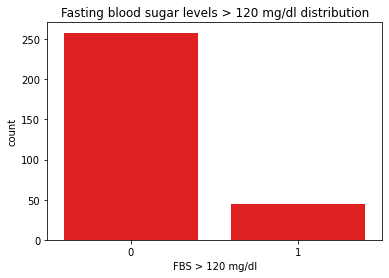

In [26]:
# check the distribution of fasting blood sugar levels
sn.countplot(data=data, x="fbs", color="red")
plt.xlabel("FBS > 120 mg/dl")
plt.title("Fasting blood sugar levels > 120 mg/dl distribution")
plt.show()

**fasting blood sugar :** 1 = true; 0 = false

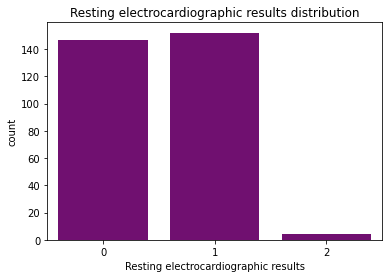

In [27]:
# check the distribution of restecg
sn.countplot(data=data, x="restecg", color="purple")
plt.xlabel("Resting electrocardiographic results")
plt.title("Resting electrocardiographic results distribution")
plt.show()

**resting electrocardiographic results:** 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

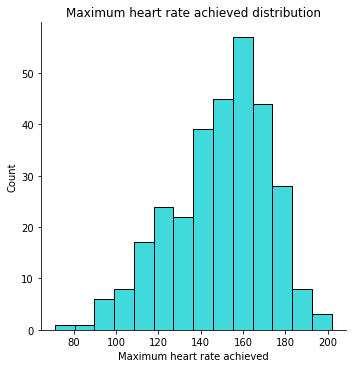

In [28]:
# check the distribution of thalachh
sn.displot(data=data, x="thalachh", color="darkturquoise")
plt.xlabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved distribution")
plt.show()

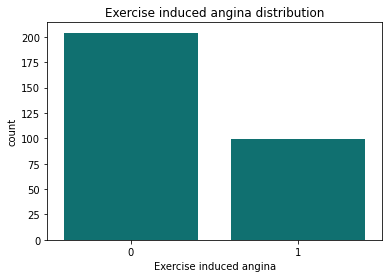

In [29]:
# check the distribution of exng
sn.countplot(data=data, x="exng", color="teal")
plt.xlabel("Exercise induced angina")
plt.title("Exercise induced angina distribution")
plt.show()

**exercise induced angina:** 1: yes; 0: no

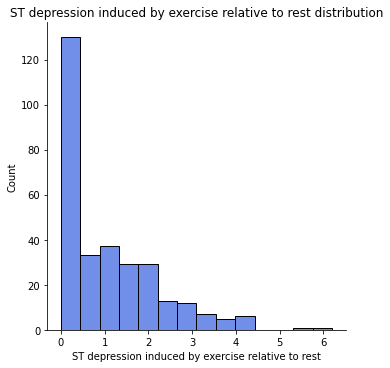

In [30]:
# check the distribution of oldpeak
sn.displot(data=data, x="oldpeak", color="royalblue")
plt.xlabel("ST depression induced by exercise relative to rest")
plt.title("ST depression induced by exercise relative to rest distribution")
plt.show()

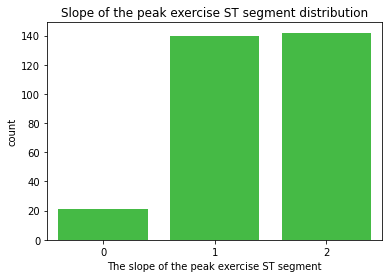

In [31]:
# check the distribution of slp
sn.countplot(data=data, x="slp", color="limegreen")
plt.xlabel("The slope of the peak exercise ST segment")
plt.title("Slope of the peak exercise ST segment distribution")
plt.show()

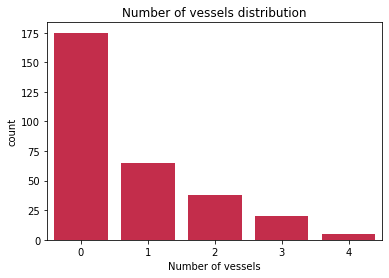

In [32]:
# check the distribution of caa
sn.countplot(data=data, x="caa", color="crimson")
plt.xlabel("Number of vessels")
plt.title("Number of vessels distribution")
plt.show()

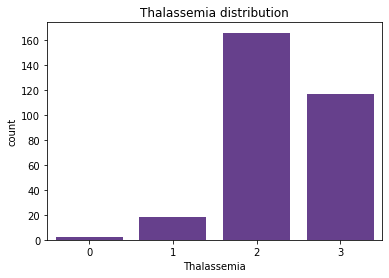

In [33]:
# check the distribution of thall
sn.countplot(data=data, x="thall", color="rebeccapurple")
plt.xlabel("Thalassemia")
plt.title("Thalassemia distribution")
plt.show()

**thalassemia:** 0: null; 1: fixed defect; 2: normal; 3: reversable defect

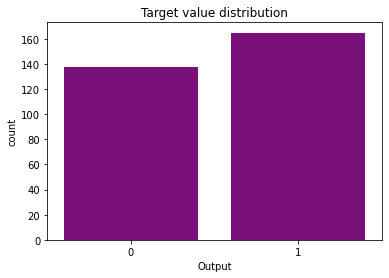

In [34]:
# check the distribution of output (our target variable)
# 0 = less chance of heart attack; 1 = more chance of heart attack
sn.countplot(data=data, x="output", color="darkmagenta")
plt.xlabel("Output")
plt.title("Target value distribution")
plt.show()

**output (target variable):** 0: < 50% diameter narrowing. less chance of heart disease; 1: > 50% diameter narrowing. more chance of heart disease

In [35]:
# analysis of the categorical variables
categorical_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
data_categorical = data.loc[:,categorical_var]
data_categorical

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


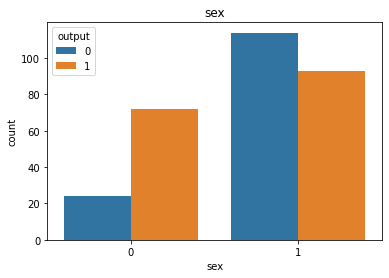

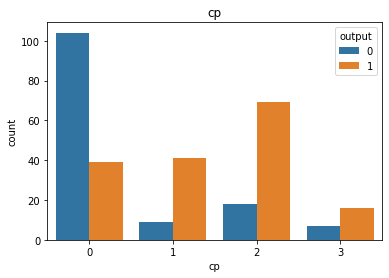

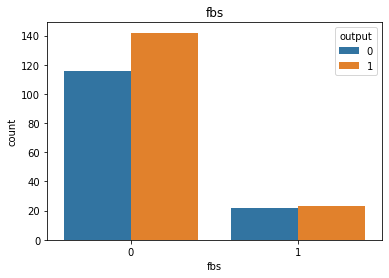

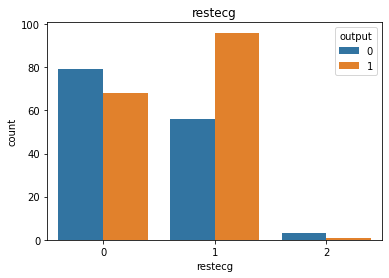

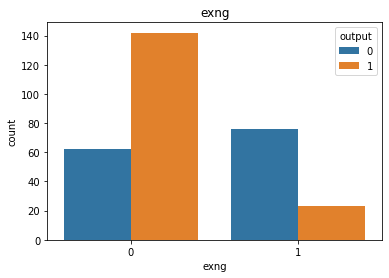

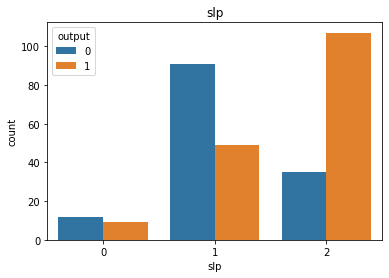

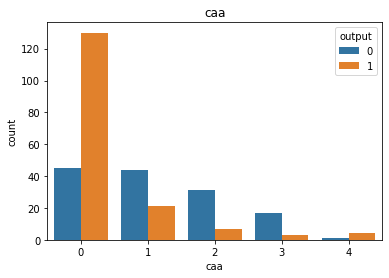

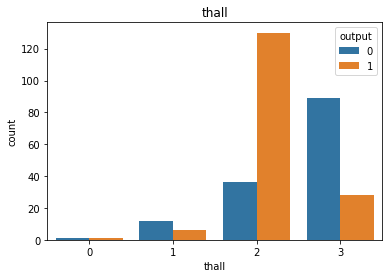

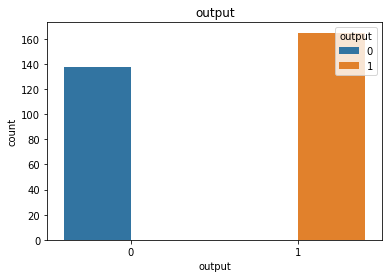

In [438]:
# plotting the categorical variables against the target variable
for i in categorical_var:
    plt.figure()
    sn.countplot(x=i, data=data_categorical, hue="output") #, color="darkblue")
    plt.title(i)

# Statistical tests and correlation

In [437]:
# logarithmic transformation
log_data = np.log2(data)

In [19]:
# scaling the data
array_data = preprocessing.scale(data)
data_scale = pd.DataFrame(array_data, index=data.index, columns=data.columns)
data_scale

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2_saturation,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,3.232954,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,3.232954,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,3.232954,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1.788564,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.055297,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0.055297,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0.055297,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0.055297,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0.055297,-1.093459


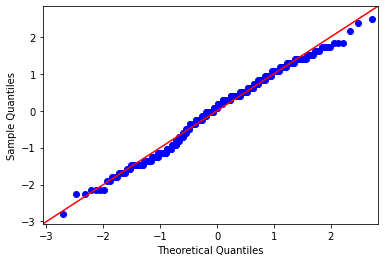

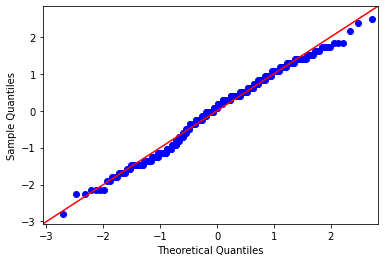

In [39]:
# check if age follows a normal distribution
sm.qqplot(data_scale.age, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

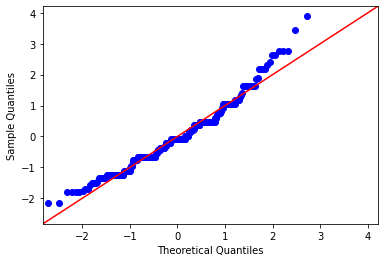

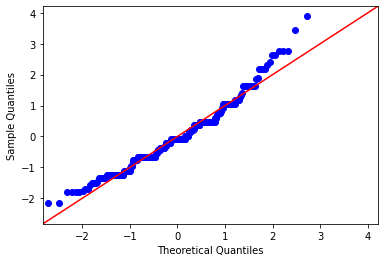

In [40]:
# check if trtbps follows a normal distribution
sm.qqplot(data_scale.trtbps, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

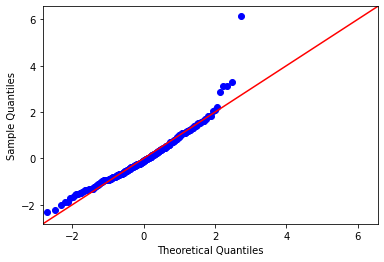

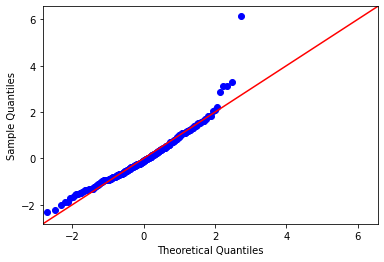

In [41]:
# check if chol follows a normal distribution
sm.qqplot(data_scale.chol, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

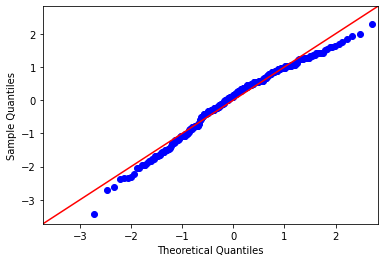

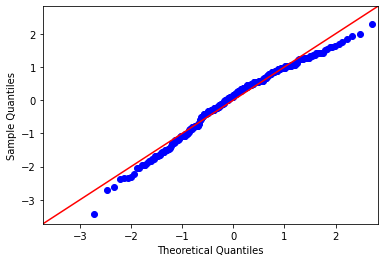

In [42]:
# check if thalachh follows a normal distribution
sm.qqplot(data_scale.thalachh, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

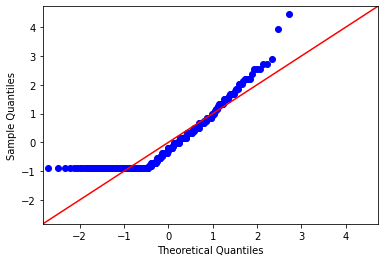

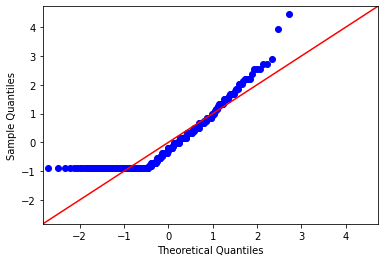

In [43]:
# check if oldpeak follows a normal distribution
sm.qqplot(data_scale.oldpeak, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

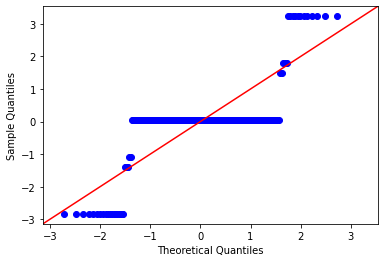

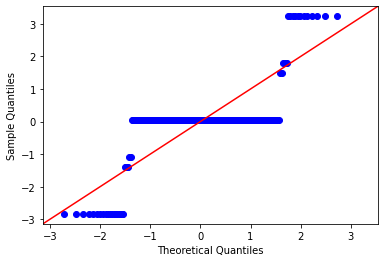

In [44]:
# check if o2_saturation follows a normal distribution
sm.qqplot(data_scale.o2_saturation, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

In [45]:
# remove the oldpeak and o2_saturation variables ---------------- não remover?

# not_normal_var = ['oldpeak', 'o2_saturation']
# data_ = data_scale.drop(not_normal_var, axis=1)
# data_

In [46]:
data_scale.shape

(303, 15)

In [47]:
# normality test - shapiro test
scipy.stats.shapiro(x=data_scale)
# H0 is rejected - the data is considered to be not normally distributed

ShapiroResult(statistic=0.972541868686676, pvalue=1.0842821882854865e-28)

In [48]:
# creation of the correlation matrix for all variables
corr_matrix_ = data_scale.corr(method='spearman')
corr_matrix_

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2_saturation,output
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.340955,0.087254,0.014520,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.119368,0.250821,-0.143777,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.216006,-0.207840,0.116193,0.460860
trtbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.090140,0.059673,0.011077,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.111981,0.083628,-0.044291,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.134513,-0.006737,-0.046915,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.097862,-0.010982,0.076857,0.148612
thalachh,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.257347,-0.160581,0.133926,0.428370
exng,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.162025,0.247113,-0.065314,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.224895,0.255026,0.023102,-0.421487


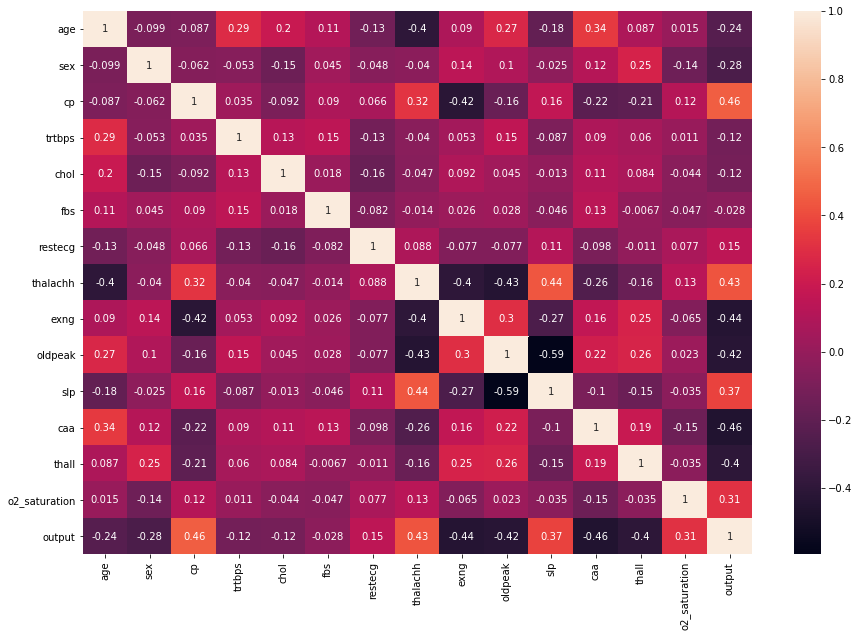

In [49]:
# heatmap of the variables
plt.figure(figsize=(15, 10))
sn.heatmap(corr_matrix_.iloc[:15,:15], annot=True)
plt.show()

Values closer to 1 mean that the variables are more correlated to one another, comparing to values closer to -1.

The more correlated variables to our target variable (output) are cp, thalachh, slp and o2_saturation; the less correlated variables are caa, exng, oldpeak and thall.

In [50]:
# creation of the correlation matrix only for categorical variables
corr_matrix = data_categorical.corr(method='spearman')
corr_matrix

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
sex,1.000000,-0.062041,0.045032,-0.048389,0.141664,-0.025010,0.119368,0.250821,-0.280937
cp,-0.062041,1.000000,0.089775,0.065640,-0.418256,0.159478,-0.216006,-0.207840,0.460860
fbs,0.045032,0.089775,1.000000,-0.081508,0.025665,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.048389,0.065640,-0.081508,1.000000,-0.077399,0.113661,-0.097862,-0.010982,0.148612
exng,0.141664,-0.418256,0.025665,-0.077399,1.000000,-0.274475,0.162025,0.247113,-0.436757
slp,-0.025010,0.159478,-0.045786,0.113661,-0.274475,1.000000,-0.099901,-0.154886,0.371460
caa,0.119368,-0.216006,0.134513,-0.097862,0.162025,-0.099901,1.000000,0.189103,-0.457607
thall,0.250821,-0.207840,-0.006737,-0.010982,0.247113,-0.154886,0.189103,1.000000,-0.403299
output,-0.280937,0.460860,-0.028046,0.148612,-0.436757,0.371460,-0.457607,-0.403299,1.000000


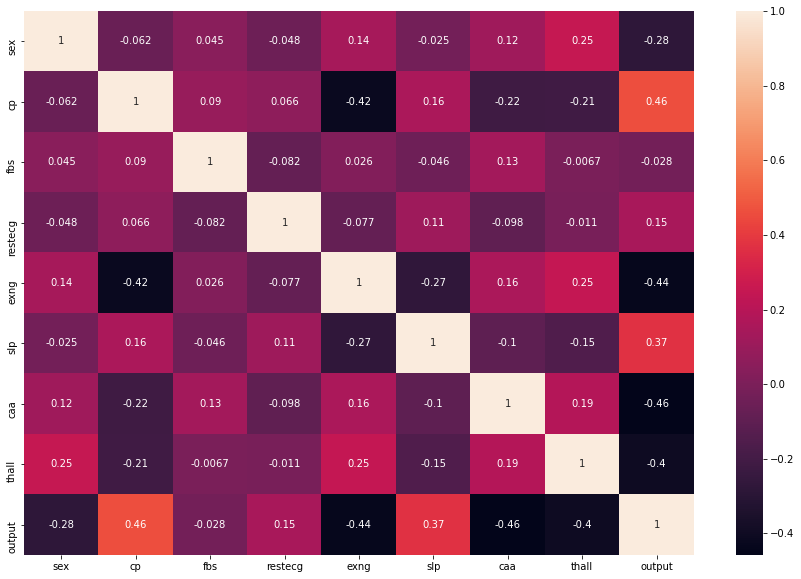

In [51]:
# heatmap of the categorical variables
plt.figure(figsize=(15, 10))
sn.heatmap(corr_matrix.iloc[:15,:15], annot=True)
plt.show()

The more correlated categorical variables to our target variable (output) are cp and slp; the less correlated variables are caa, exng, thall and sex.

As this dataset is a classification problem (supervised learning), we decided not to do the clustering and PCA analysis, since those techniques are used in unsupervised learning.

# Supervised learning

In [394]:
# imports
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, hinge_loss, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, SelectPercentile

import matplotlib.pyplot as plt

## Model Fitting
- Support Vector Machine
- Logistic Regression
- K-Nearest Neighbors

In [53]:
# check the shape of the dataset
data_scale.shape

(303, 15)

In [98]:
# copy data to create a dataset to get the dummy variables - we can't do the LR on continuous variables, so we need to convert a categorical variable,
# which can take on multiple levels or categories, into multiple binary variables, each of which represents a single level or category of the original
# variable.
dummy_data = data.copy()
dummy_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2_saturation,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,97.5,1


In [99]:
# get the numeric variables dataframe
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak", "o2_saturation"]
data_numeric = data[numeric_var]
data_numeric.head()

,age,trtbps,chol,thalachh,oldpeak,o2_saturation
0,63,145,233,150,2.3,98.6
1,37,130,250,187,3.5,98.6
2,41,130,204,172,1.4,98.6
3,56,120,236,178,0.8,98.1
4,57,120,354,163,0.6,97.5


In [100]:
# get the list of categorical variables without the target (label)
categorical_var[:-1]

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [101]:
# use the dummy variables to do the logistic regression
dummy_data = pd.get_dummies(dummy_data, columns=categorical_var[:-1], drop_first=True)
dummy_data

,age,trtbps,chol,thalachh,oldpeak,o2_saturation,output,sex_1,cp_1,cp_2,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,98.6,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,98.6,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,98.6,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,98.1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,97.5,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,97.5,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,97.5,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,97.5,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,97.5,0,1,0,0,...,1,1,0,1,0,0,0,0,0,1


In [185]:
# create a pd dataframe with all variables without the target variable - X
X = dummy_data.drop("output", axis=1)
print("Type: ", type(X))
X.head()

Type:  <class 'pandas.core.frame.DataFrame'>


,age,trtbps,chol,thalachh,oldpeak,o2_saturation,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,98.6,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,98.6,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,98.6,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,98.1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,97.5,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [186]:
# create the label array - y
y = dummy_data.output
print("Type: ", type(y))
y.head()

Type:  <class 'pandas.core.series.Series'>


0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [187]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# check dimensions
print("X_train:\n  Length: ", len(X_train), "\n  Shape: ", X_train.shape)
print("X_test:\n  Length: ", len(X_test), "\n  Shape: ", X_test.shape)
print("y_train:\n  Length: ", len(y_train), "\n  Shape: ", y_train.shape)
print("y_test:\n  Length: ", len(y_test), "\n  Shape: ", y_test.shape)

X_train:
  Length:  227 
  Shape:  (227, 23)
X_test:
  Length:  76 
  Shape:  (76, 23)
y_train:
  Length:  227 
  Shape:  (227,)
y_test:
  Length:  76 
  Shape:  (76,)


Standardization

In [188]:
# scale the data
scaler = StandardScaler().fit(X_train)
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

## Support Vector Machine

In [405]:
# create an instance of SVC
clf = SVC(kernel='linear')

# perform 5 fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

# cross validation with scoring function F1
scores_f1 = cross_val_score(clf, X, y, scoring="f1_weighted", cv=5)
print("\nScores F1: ", scores_f1)

# cross validation with leave one out
# loo_cv = LeaveOneOut()
# scores_loo = cross_val_score(clf, X, y, cv=loo_cv)
# print("Score mean with leave one out :", scores_loo.mean())

# fit the model on the entire train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test) # predicted labels
# print("\nPredicted values: ", y_pred)
# print("\nReal values: ", y_test)

# calculate score
score = clf.score(X_test, y_test)
print(f"\nScore of SVM model: {score:.5f}")

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of SVM model: {acc:.5f}")

# get classification report
print("\nClassification report of SVM model:\n", classification_report(y_test, y_pred))

# calculate cost - the lower the hinge loss, the better the model
svm_cost = hinge_loss(y_test, y_pred)
print(f"\nCost of SVM model: {svm_cost:.5f}")
# 0.59: the model is not performing well in separating the classes and there is a large difference between the true labels and the decision function
# of the model

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

print("------------------------------------")

Cross validation scores:  [0.89130435 0.84782609 0.73333333 0.91111111 0.77777778]

Scores F1:  [0.88255109 0.86906444 0.77086278 0.81630527 0.83142857]

Score of SVM model: 0.86842

Accuracy of SVM model: 0.86842

Classification report of SVM model:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76


Cost of SVM model: 0.59211

Confusion matrix: 
 [[30  5]
 [ 5 36]]
------------------------------------


## Logistic Regression

In [406]:
# create an instance of LogisticRegression
clf = LogisticRegression(random_state=42)

# perform 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

# cross validation with scoring function F1
scores_f1 = cross_val_score(clf, X, y, scoring="f1_weighted", cv=5)
print("\nScores F1: ", scores_f1)

# cross validation with leave one out
# loo_cv = LeaveOneOut()
# scores_loo = cross_val_score(clf, X, y, cv=loo_cv)
# print("Score mean with leave one out :", scores_loo.mean())

# fit the model on the entire train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test) # predicted labels
# print("Predicted values: ", y_pred)
# print("Real values: ", y_test)

# calculate score
score = clf.score(X_test, y_test)
print(f"\nScore of Logistic Regression model: {score:.5f}")

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression model: {acc:.5f}")

# classification report
print("\nClassification report of Logistic Regression model:\n", classification_report(y_test, y_pred))

# cost - the lower the log loss, the better the model is
lr_cost = log_loss(y_test, y_pred)
print(f"\nCost of Logistic Regression model: {lr_cost:.5f}")
# 4.9: the model is not performing well in predicting the true labels and there is a large difference between the predicted probabilities and the
# true labels - it could be overfitting

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

print("------------------------------------")

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Cross validation scores:  [0.86956522 0.80434783 0.75555556 0.86666667 0.77777778]


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


Scores F1:  [0.81937852 0.91789933 0.81967213 0.8488491  0.81526002]

Score of Logistic Regression model: 0.85526

Accuracy of Logistic Regression model: 0.85526

Classification report of Logistic Regression model:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76


Cost of Logistic Regression model: 4.99909

Confusion matrix: 
 [[30  5]
 [ 6 35]]
------------------------------------


## K-Nearest Neighbors

In [408]:
# create an instance of KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)

# perform 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

# cross validation with scoring function F1
scores_f1 = cross_val_score(clf, X, y, scoring="f1_weighted", cv=5)
print("\nScores F1: ", scores_f1)

# cross validation with leave one out
# loo_cv = LeaveOneOut()
# scores_loo = cross_val_score(clf, X, y, cv=loo_cv)
# print("Score mean with leave one out :", scores_loo.mean())

# fit the model on the entire train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test) # predicted labels
# print("Predicted values: ", y_pred)
# print("Real values: ", y_test)

# calculate score
score = clf.score(X_test, y_test)
print(f"\nScore of Logistic Regression model: {score:.5f}")

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression model: {acc:.5f}")

# classification report
print("\nClassification report of Logistic Regression model:\n", classification_report(y_test, y_pred))

# cost - the lower the log loss, the better the model is
lr_cost = log_loss(y_test, y_pred)
print(f"\nCost of Logistic Regression model: {lr_cost:.5f}")
# 4.9: the model is not performing well in predicting the true labels and there is a large difference between the predicted probabilities and
# the true labels - it could be overfitting

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

print("------------------------------------")

Cross validation scores:  [0.63043478 0.73913043 0.55555556 0.55555556 0.71111111]

Scores F1:  [0.63796921 0.6177444  0.63796921 0.74950718 0.61591101]

Score of Logistic Regression model: 0.75000

Accuracy of Logistic Regression model: 0.75000

Classification report of Logistic Regression model:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.74      0.83      0.78        41

    accuracy                           0.75        76
   macro avg       0.75      0.74      0.74        76
weighted avg       0.75      0.75      0.75        76


Cost of Logistic Regression model: 8.63482

Confusion matrix: 
 [[23 12]
 [ 7 34]]
------------------------------------


## Ensemble
- Bagging Classifier
- Random Forest
- Voting Classifier - simple voting
- Voting Classifier - with weights

Bagging Classifier

In [410]:
# create an instance of DecisionTreeClassifier
base_estimator = DecisionTreeClassifier()

# create an instance of BaggingClassifier
clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, max_samples=0.8, random_state=42)

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate the score
score = cross_val_score(clf, X, y, cv=5)
print("Score using Decision Tree Classifier: ", score)

Score:  [0.75409836 0.67213115 0.75409836 0.75       0.81666667]


In [419]:
# create an instance of KNN
base_estimator = KNeighborsClassifier(n_neighbors=11)

# create an instance of BaggingClassifier
clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, max_samples=0.8, random_state=42)

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate the score
score = cross_val_score(clf, X, y, cv=5)
print("Score using KNN: ", score)

Score using KNN:  [0.63934426 0.6557377  0.62295082 0.66666667 0.58333333]


Random Forest

In [420]:
# create an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate the score
print("Score using Random Forest: ", scores_rf)
print("Mean of scores using Random Forest: ", scores_rf.mean())

Score using Random Forest:  [0.7704918  0.83606557 0.78688525 0.8        0.81666667]
Mean of scores using Random Forest:  0.8020218579234972


Voting Classifier - simple voting

In [431]:
# create instances of Logistic Regression, Random Forest and Naive Bayes classifiers
lr = LogisticRegression()
rf = RandomForestClassifier()
nb = GaussianNB()

# create an instance of Voting Classifier
clf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('nb', nb)], voting='hard')

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate the accuracy
acc = clf.score(X_test, y_test)
print("Accuracy of the Voting Classifier: ", acc)

# calculate the accuracy of each classifier
clf_list = [lr, rf, nb, clf]
model_alg_list = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip(clf_list, model_alg_list):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(f"\nAccuracy using Simple Voting Classifier: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the Voting Classifier:  0.868421052631579


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


Accuracy using Simple Voting Classifier: 0.84 (std 0.04) [Logistic Regression]

Accuracy using Simple Voting Classifier: 0.80 (std 0.02) [Random Forest]

Accuracy using Simple Voting Classifier: 0.79 (std 0.05) [Naive Bayes]


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


Accuracy using Simple Voting Classifier: 0.83 (std 0.03) [Ensemble]


Voting Classifier - with weights

In [432]:
# create instances of Decision Trees, KNN and SVM
dt = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=11)
svc = SVC(gamma='scale', kernel='rbf', probability=True)

# create an instance of Voting Classifier
clf = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('svc', svc)], voting='soft', weights=[1, 2, 3])

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate the accuracy
acc = clf.score(X_test, y_test)
print("Accuracy of the Voting Classifier with weights: ", acc)

# calculate the accuracy of each classifier
clf_list = [dt, knn, svc, clf]
model_alg_list = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip(clf_list, model_alg_list):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(f"\nAccuracy using Simple Voting Classifier: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy of the Voting Classifier with weights:  0.8552631578947368

Accuracy using Simple Voting Classifier: 0.78 (std 0.02) [Logistic Regression]

Accuracy using Simple Voting Classifier: 0.65 (std 0.05) [Random Forest]

Accuracy using Simple Voting Classifier: 0.64 (std 0.05) [Naive Bayes]

Accuracy using Simple Voting Classifier: 0.72 (std 0.02) [Ensemble]


## Feature selection
- Variance Threshold
- Select K Best
- Select Percentile

Variance Threshold

In [376]:
# create an instance of VarianceThreshold
selector = VarianceThreshold(threshold=0.1)

# fit the selector on the train data
selector.fit(X_train)

# transform the train and test data
# features that don't vary much (ie, are constant) are removed - are less informative
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print('X_train shape before Variance Threshold: ', X_train.shape)
print('X_train shape after Variance Threshold: ', X_train_new.shape)
print('X_test shape before Variance Threshold: ', X_test.shape)
print('X_test shape after Variance Threshold: ', X_test_new.shape)

# fit a logistic regression model on the new data
clf = LogisticRegression()

# perform a 5-fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("\nCross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Variance Threshold Method: ", acc)

X_train shape before Variance Threshold:  (227, 23)
X_train shape after Variance Threshold:  (227, 17)
X_test shape before Variance Threshold:  (76, 23)
X_test shape after Variance Threshold:  (76, 17)


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


Cross validation scores:  [0.86956522 0.82608696 0.77777778 0.86666667 0.75555556]

Accuracy using Variance Threshold Method:  0.8552631578947368


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Select K Best

In [457]:
# create an instance of SelectKBest - f_classification
selector = SelectKBest(score_func=f_classif, k=7)

# fit the selector on the train data
selector.fit(X_train, y_train)

# transform the train and test data
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print('X_train shape before Select K Best: ', X_train.shape)
print('X_train shape after Select K Best: ', X_train_new.shape)
print('X_test shape before Select K Best: ', X_test.shape)
print('X_test shape after Select K Best: ', X_test_new.shape)

# fit a logistic regression model on the new data
clf = LogisticRegression()

# perform 5 fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("Cross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Select K-Best Method: ", acc)

X_train shape before Select K Best:  (227, 23)
X_train shape after Select K Best:  (227, 7)
X_test shape before Select K Best:  (76, 23)
X_test shape after Select K Best:  (76, 7)


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Cross validation scores:  [0.7826087  0.80434783 0.71111111 0.82222222 0.77777778]

Accuracy using Select K-Best Method:  0.868421052631579


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [455]:
# create an instance of SelectKBest - chi2
selector = SelectKBest(score_func=chi2, k=17)

# fit the selector on the train data
selector.fit(X_train, y_train)

# transform the train and test data
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print('X_train shape before Select K Best: ', X_train.shape)
print('X_train shape after Select K Best: ', X_train_new.shape)
print('X_test shape before Select K Best: ', X_test.shape)
print('X_test shape after Select K Best: ', X_test_new.shape)

# fit a logistic regression model on the new data
clf = LogisticRegression()

# perform 5 fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("Cross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Select K-Best Method: ", acc)

X_train shape before Select K Best:  (227, 23)
X_train shape after Select K Best:  (227, 17)
X_test shape before Select K Best:  (76, 23)
X_test shape after Select K Best:  (76, 17)


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Cross validation scores:  [0.89130435 0.7826087  0.71111111 0.88888889 0.75555556]

Accuracy using Select K-Best Method:  0.868421052631579


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Select Percentile

In [384]:
# create an instance of SelectPercentile
selector = SelectPercentile(score_func=f_classif, percentile=50)

# fit the selector on the train data
selector.fit(X_train, y_train)

# transform the train and test data
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

# fit a logistic regression model on the new data
clf = LogisticRegression()

# perform 5-fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("Cross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Select Percentile Method: ", acc)

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Cross validation scores:  [0.82608696 0.7826087  0.77777778 0.88888889 0.75555556]

Accuracy using Select Percentile Method:  0.8552631578947368


## Hyperparameter tuning
- Grid Search
- Randomized Parameter Optimization

Grid Search

In [386]:
# create an instance of LogisticRegression
clf = LogisticRegression()

# specify the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10],
             'penalty': ['l1', 'l2']}

# perform 5-fold cross validation and grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: ", grid_search.best_params_)

# predict on the test data
y_pred = grid_search.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

Best parameters:  {'C': 10, 'penalty': 'l2'}
Accuracy:  0.8289473684210527


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [ ]:
# create an instance of SVC
svc = SVC()

# define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'degree':[1, 2, 3], 'gamma': [0.1, 1, 10]}

# create an instance of GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5)

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: ", grid_search.bestparams)

Randomized Search

In [391]:
# create an instance of LogisticRegression
clf = LogisticRegression()

# specify the hyperparameters and their possible values
param_grid = {'C': uniform(loc=0, scale=10),
             'penalty': ['l1', 'l2']}

# perform 5-fold cross validation and grid search
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: ", random_search.best_params_)

# predict on the test data
y_pred = random_search.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Best parameters:  {'C': 3.4960570724553697, 'penalty': 'l2'}
Accuracy:  0.8421052631578947


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
